In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
Train_Data = pd.read_csv("et_tp.AAC.train.csv")
Test_Data = pd.read_csv("et_tp.AAC.test.csv")
Train_Data.tail()

,f.1,f.2,f.3,f.4,f.5,f.6,f.7,f.8,f.9,f.10,...,f.12,f.13,f.14,f.15,f.16,f.17,f.18,f.19,f.20,class
4913,0.110895,0.017510,0.038911,0.021401,0.070039,0.112840,0.019455,0.046693,0.023346,0.101167,...,0.033074,0.029183,0.015564,0.036965,0.097276,0.071984,0.064202,0.025292,0.040856,no
4914,0.057803,0.008671,0.063584,0.066474,0.028902,0.101156,0.017341,0.049133,0.057803,0.092486,...,0.049133,0.034682,0.043353,0.086705,0.086705,0.054913,0.066474,0.005780,0.008671,no
4915,0.082915,0.015075,0.042714,0.070352,0.025126,0.077889,0.087940,0.092965,0.040201,0.092965,...,0.035176,0.015075,0.017588,0.035176,0.067839,0.045226,0.100503,0.015075,0.015075,no
4916,0.071233,0.010959,0.038356,0.042466,0.056164,0.073973,0.017808,0.054795,0.043836,0.116438,...,0.031507,0.038356,0.023288,0.053425,0.113699,0.049315,0.068493,0.013699,0.041096,no
4917,0.076570,0.010720,0.075038,0.062787,0.052067,0.055130,0.012251,0.047473,0.056662,0.096478,...,0.039816,0.059724,0.044410,0.045942,0.104135,0.068913,0.041348,0.009188,0.021440,no


In [3]:
Test_Data.head()

,f.1,f.2,f.3,f.4,f.5,f.6,f.7,f.8,f.9,f.10,...,f.12,f.13,f.14,f.15,f.16,f.17,f.18,f.19,f.20,class
0,0.032967,0.043956,0.076923,0.241758,0.032967,0.021978,0.054945,0.000000,0.065934,0.120879,...,0.021978,0.021978,0.032967,0.043956,0.043956,0.054945,0.054945,0.000000,0.010989,yes
1,0.152174,0.000000,0.054348,0.027174,0.038043,0.086957,0.021739,0.043478,0.043478,0.081522,...,0.032609,0.032609,0.070652,0.032609,0.103261,0.038043,0.076087,0.027174,0.021739,yes
2,0.114094,0.006711,0.038031,0.042506,0.049217,0.080537,0.049217,0.038031,0.040268,0.120805,...,0.020134,0.053691,0.020134,0.049217,0.082774,0.042506,0.058166,0.024609,0.035794,yes
3,0.126074,0.011461,0.074499,0.068768,0.017192,0.103152,0.034384,0.048711,0.014327,0.077364,...,0.037249,0.074499,0.028653,0.054441,0.037249,0.057307,0.065903,0.028653,0.028653,yes
4,0.101382,0.032258,0.055300,0.050691,0.018433,0.082949,0.023041,0.064516,0.082949,0.087558,...,0.027650,0.046083,0.023041,0.041475,0.059908,0.059908,0.096774,0.004608,0.018433,yes


In [4]:
Train_Data.shape

(4918, 21)

In [5]:
Test_Data.shape

(889, 21)

In [6]:
print(Train_Data.isna().sum().max())
print(Test_Data.isna().sum().max())

0
0


In [7]:
Train_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4918 entries, 0 to 4917
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f.1     4918 non-null   float64
 1   f.2     4918 non-null   float64
 2   f.3     4918 non-null   float64
 3   f.4     4918 non-null   float64
 4   f.5     4918 non-null   float64
 5   f.6     4918 non-null   float64
 6   f.7     4918 non-null   float64
 7   f.8     4918 non-null   float64
 8   f.9     4918 non-null   float64
 9   f.10    4918 non-null   float64
 10  f.11    4918 non-null   float64
 11  f.12    4918 non-null   float64
 12  f.13    4918 non-null   float64
 13  f.14    4918 non-null   float64
 14  f.15    4918 non-null   float64
 15  f.16    4918 non-null   float64
 16  f.17    4918 non-null   float64
 17  f.18    4918 non-null   float64
 18  f.19    4918 non-null   float64
 19  f.20    4918 non-null   float64
 20  class   4918 non-null   object 
dtypes: float64(20), object(1)
memory usag

In [9]:
Train_Data["class"]= pd.get_dummies(Train_Data['class'], drop_first=True)
Train_Data.tail()

,f.1,f.2,f.3,f.4,f.5,f.6,f.7,f.8,f.9,f.10,...,f.12,f.13,f.14,f.15,f.16,f.17,f.18,f.19,f.20,class
4913,0.110895,0.017510,0.038911,0.021401,0.070039,0.112840,0.019455,0.046693,0.023346,0.101167,...,0.033074,0.029183,0.015564,0.036965,0.097276,0.071984,0.064202,0.025292,0.040856,0
4914,0.057803,0.008671,0.063584,0.066474,0.028902,0.101156,0.017341,0.049133,0.057803,0.092486,...,0.049133,0.034682,0.043353,0.086705,0.086705,0.054913,0.066474,0.005780,0.008671,0
4915,0.082915,0.015075,0.042714,0.070352,0.025126,0.077889,0.087940,0.092965,0.040201,0.092965,...,0.035176,0.015075,0.017588,0.035176,0.067839,0.045226,0.100503,0.015075,0.015075,0
4916,0.071233,0.010959,0.038356,0.042466,0.056164,0.073973,0.017808,0.054795,0.043836,0.116438,...,0.031507,0.038356,0.023288,0.053425,0.113699,0.049315,0.068493,0.013699,0.041096,0
4917,0.076570,0.010720,0.075038,0.062787,0.052067,0.055130,0.012251,0.047473,0.056662,0.096478,...,0.039816,0.059724,0.044410,0.045942,0.104135,0.068913,0.041348,0.009188,0.021440,0


In [10]:
Test_Data["class"]= pd.get_dummies(Test_Data['class'], drop_first=True)
Test_Data.tail()

,f.1,f.2,f.3,f.4,f.5,f.6,f.7,f.8,f.9,f.10,...,f.12,f.13,f.14,f.15,f.16,f.17,f.18,f.19,f.20,class
884,0.062016,0.015504,0.019380,0.031008,0.065891,0.065891,0.011628,0.089147,0.065891,0.143411,...,0.038760,0.046512,0.019380,0.015504,0.073643,0.046512,0.089147,0.007752,0.054264,0
885,0.121622,0.006757,0.047297,0.033784,0.033784,0.121622,0.013514,0.054054,0.087838,0.087838,...,0.033784,0.020270,0.006757,0.020270,0.081081,0.074324,0.081081,0.013514,0.040541,0
886,0.104982,0.016014,0.032028,0.030249,0.042705,0.092527,0.016014,0.085409,0.032028,0.113879,...,0.023132,0.049822,0.037367,0.030249,0.078292,0.072954,0.085409,0.021352,0.021352,0
887,0.169903,0.000000,0.033981,0.024272,0.048544,0.063107,0.033981,0.033981,0.009709,0.131068,...,0.019417,0.058252,0.019417,0.053398,0.048544,0.038835,0.111650,0.029126,0.038835,0
888,0.013605,0.006803,0.088435,0.061224,0.027211,0.020408,0.027211,0.068027,0.034014,0.156463,...,0.047619,0.027211,0.027211,0.054422,0.088435,0.074830,0.074830,0.020408,0.061224,0


In [11]:
X_train, y_train = Train_Data.drop(columns=["class"]), Train_Data["class"]

In [12]:
X_test, y_test = Test_Data.drop(columns=["class"]), Test_Data["class"]

In [14]:
#follow https://michael-fuchs-python.netlify.app/2019/11/11/introduction-to-sgd-classifier/

In [21]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
import time

In [19]:
clf = SGDClassifier(loss="log", penalty="l2")
clf.fit(X_train, y_train)

SGDClassifier(loss='log')

In [23]:
y_pred = clf.predict(X_test)
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Accuracy: 0.80


/home/joy/venv/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/joy/venv/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/joy/venv/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


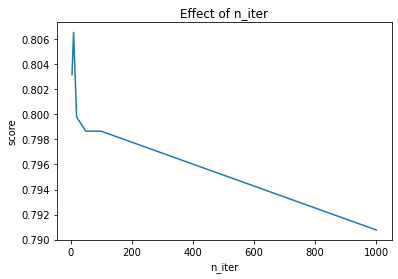

In [26]:
n_iters = [5, 10, 20, 50, 100, 1000]
scores = []
for n_iter in n_iters:
    clf = SGDClassifier(loss="log", penalty="l2", max_iter=n_iter)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))
  
plt.title("Effect of n_iter")
plt.xlabel("n_iter")
plt.ylabel("score")
plt.plot(n_iters, scores) 

In [27]:
clf = SGDClassifier(loss="hinge", penalty="l2")
clf.fit(X_train, y_train)

SGDClassifier()

In [28]:
y_pred = clf.predict(X_test)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Accuracy: 0.80


/home/joy/venv/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/joy/venv/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/joy/venv/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


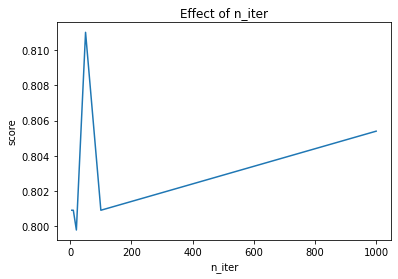

In [29]:
n_iters = [5, 10, 20, 50, 100, 1000]
scores = []
for n_iter in n_iters:
    clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=n_iter)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))
  
plt.title("Effect of n_iter")
plt.xlabel("n_iter")
plt.ylabel("score")
plt.plot(n_iters, scores)

In [33]:
from sklearn.svm import SVC

In [34]:
start = time.time()
clf = SGDClassifier(loss="hinge", penalty="l2")
clf.fit(X_train, y_train)
stop = time.time()
print(f"Training time for linear SVM with SGD training: {stop - start}s")

start = time.time()
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)
stop = time.time()
print(f"Training time for linear SVM without SGD training: {stop - start}s")

Training time for linear SVM with SGD training: 0.013032197952270508s
Training time for linear SVM without SGD training: 0.2616307735443115s


/home/joy/venv/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


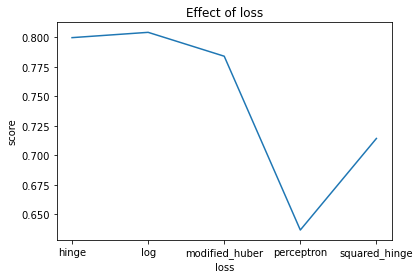

In [35]:
losses = ["hinge", "log", "modified_huber", "perceptron", "squared_hinge"]
scores = []
for loss in losses:
    clf = SGDClassifier(loss=loss, penalty="l2", max_iter=1000)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))
  
plt.title("Effect of loss")
plt.xlabel("loss")
plt.ylabel("score")
x = np.arange(len(losses))
plt.xticks(x, losses)
plt.plot(x, scores) 

In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
params = {
    "loss" : ["hinge", "log", "squared_hinge", "modified_huber", "perceptron"],
    "alpha" : [0.0001, 0.001, 0.01, 0.1],
    "penalty" : ["l2", "l1", "elasticnet", "none"],
}

clf = SGDClassifier(max_iter=1000)
grid = GridSearchCV(clf, param_grid=params, cv=10)


grid.fit(X_train, y_train)

print(grid.best_params_) 

/home/joy/venv/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/joy/venv/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/joy/venv/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/joy/venv/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before conv

/home/joy/venv/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/joy/venv/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/joy/venv/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/joy/venv/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before conv

/home/joy/venv/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/joy/venv/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/joy/venv/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/joy/venv/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before conv

/home/joy/venv/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/joy/venv/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/joy/venv/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/joy/venv/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before conv

{'alpha': 0.0001, 'loss': 'log', 'penalty': 'none'}


In [39]:
grid_predictions = grid.predict(X_test) 

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, grid_predictions)))

Accuracy: 0.80


In [13]:
# follow https://www.kdnuggets.com/2019/09/explore-world-bioinformatics-machine-learning.html

In [40]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
search = GridSearchCV(SVC(), parameters, n_jobs=-1, verbose=1)
search.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']}],
             verbose=1)

In [42]:
best_parameters = search.best_estimator_
best_parameters

SVC(C=1, gamma=0.1)

In [43]:
model = SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1,#gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
    
model.fit(X_train, y_train)

SVC(C=1, gamma=0.1, kernel='linear')

In [44]:
y_pred=model.predict(X_test)

In [45]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
print('Accuracy Score:',round(accuracy_score(y_test, y_pred),2))
#confusion matrix
cm = confusion_matrix(y_test, y_pred)

Accuracy Score: 0.81


Text(0.5, 257.44, 'Predicted label')

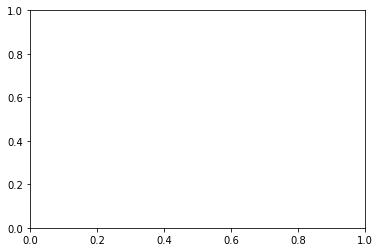

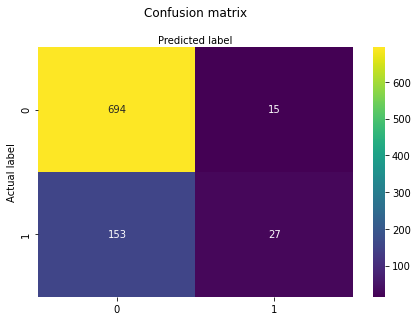

In [46]:
class_names=[1,2,3]
fig, ax = plt.subplots()
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
class_names=['ALL', 'AML']
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="viridis" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')